# Generate Simulated Data: Fixed-Plaintext-Dataset-5

In [40]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [41]:
# Define lengh for the data set
data_leng = 1000000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4
fieldMasked2 = 44

#Random Plaintext
FixedPlaintext = True

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [42]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [43]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,1000000,50,23,0.0,5.0,None,None


In [44]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [45]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
mask2 = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))
    mask2.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5],'\nmask2',mask2[0:5])

plaintext: [248, 248, 248, 248, 248] 
mask [241, 71, 110, 52, 197] 
mask2 [53, 222, 183, 98, 160]


In [46]:
# Verify size of plaintext
len(plaintext)

1000000

In [47]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [10.816263475656019, 1.7325743935476456, 12.877663971099402, 7.322166008718896, 3.2199352304030295] 
labels: [7, 7, 7, 7, 7]


In [48]:
# Verify size of leakedData 
len(leakedData)

1000000

In [49]:
# Verify size of labels 
len(labels)

1000000

In [50]:
maskedData = []
maskedNoise = []
maskedNoise2 = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex]^mask2[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise2.append((bin(mask2[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5],"\nmaskedNoise2:",maskedNoise2[0:5])

maskedData: [-0.08579754324903544, 8.506413855423357, -2.7743134912605694, 7.061903092139646, 0.2824285150414143] 
maskedNoise: [8.806203960536859, 20.683346396381268, 3.424767241792366, 11.968394841918347, 10.993889452615196] 
maskedNoise2: [-3.6186905201750434, 13.851413600596082, 10.856020141129127, 1.2770405258407496, -3.892508869190113]


In [51]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        elif z == fieldMasked2:
            rawData.append(maskedNoise2[i])     
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart,noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [2.8341720091761275, 6.759986771172666, 4.9029342536087475, 2.800877447392369, 8.806203960536859, -0.05035384381593255, 2.47447269734508, 6.615331043500401, 2.2624594185452587, -9.188622671081058, -8.239420453713326, -3.3448261062412996, 3.6702683340213595, 4.7883695312540695, 11.50562761990886, -4.937111291611336, 15.039464071318516, 4.8300839760818, 6.569610837768968, 2.6961970549600176, -2.550712924218761, -2.2196240303972727, 6.978736158471687, 7.043213059457255, -0.08579754324903544, 2.5154541770616143, 4.021839587546268, 4.330219835967601, -0.8059383448921191, 4.249607436799387, 0.503184498118812, 3.2194108435969486, -0.11357362835220286, -0.04366579380356406, 8.522345841079586, 5.246202364418467, 0.4213345694025552, -2.402494906729741, 13.448464402748392, 3.218628631584992, 0.00814362003665714, -6.99147144774709, -2.978156845776164, 5.516246581314947, -3.6186905201750434, 2.381334321737474, 5.929127753603581, -7.5668219953656735, 8.8331384048603, -3.5746

In [52]:
# Verify size of leakedData 
len(rawTraces)

1000000

## Plot Simulated Data

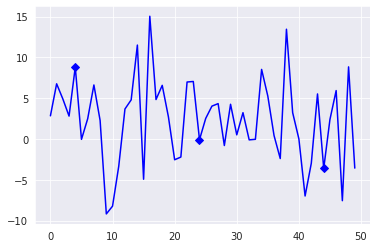

In [53]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2])

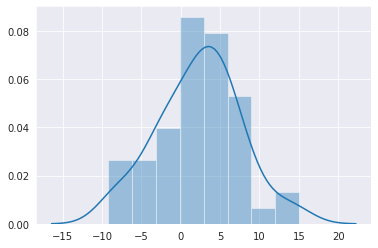

In [54]:
sns.distplot(rawTraces[0])

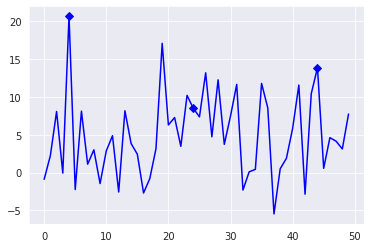

In [55]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2])

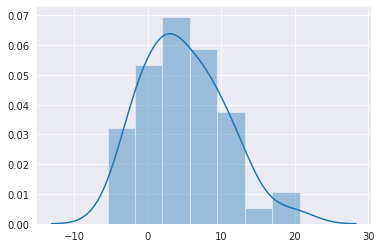

In [56]:
sns.distplot(rawTraces[1])

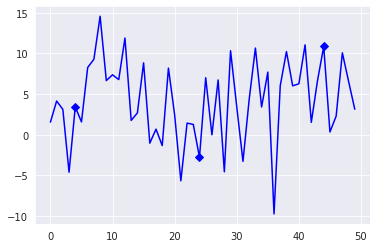

In [57]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2])

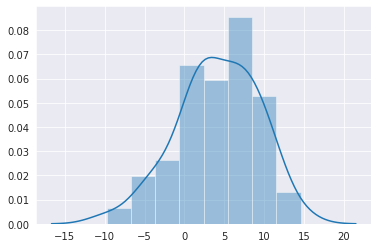

In [58]:
sns.distplot(rawTraces[2])

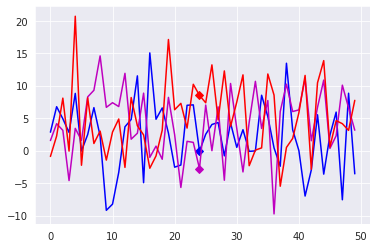

In [59]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[24])

### Data Path

In [60]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [61]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, True) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'FixedPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.633s

OK


In [62]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,2.834172,6.759987,4.902934,2.800877,8.806204,-0.050354,2.474473,6.615331,2.262459,-9.188623,...,-6.991471,-2.978157,5.516247,-3.618691,2.381334,5.929128,-7.566822,8.833138,-3.574604,248
1,-0.899938,2.244314,8.077094,-0.075137,20.683346,-2.253232,8.120381,1.097982,3.000913,-1.460095,...,11.573328,-2.871730,10.437973,13.851414,0.552741,4.613411,4.143620,3.118354,7.735978,248
2,1.547881,4.144583,3.120477,-4.610678,3.424767,1.574789,8.269443,9.285875,14.578580,6.662506,...,11.059923,1.518637,6.662780,10.856020,0.338677,2.285528,10.073683,6.577100,3.136733,248
3,6.743163,-2.776823,3.762231,11.501423,11.968395,-2.144960,0.948227,2.896117,11.536317,10.876172,...,2.514189,0.284840,-0.312145,1.277041,4.600642,4.027580,1.420067,-2.908953,-0.991090,248
4,9.877417,-0.584126,-0.442455,8.419969,10.993889,1.842356,-1.099337,-0.736502,-0.981525,-4.901766,...,4.967744,9.499246,-4.001656,-3.892509,1.714186,7.923407,-4.554254,7.012222,10.843562,248


### Write Data

In [63]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS5_B.csv',index=False)